In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, datasets, sample, audio, utils, viz

In [3]:
os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p, n_examples, n_samples = model.HParams(n_audio_chans=2, n_chans=128, n_layers=8, dilation_stacks=2), 2**4, 4
ds = audio.load_dataset_from_track('data/aria.wav', p)[:n_examples]
X, X_test = datasets.preprocess(ds, p)

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, X, X_test, train.HParams(max_epochs=1, batch_size=8, num_workers=8), None)

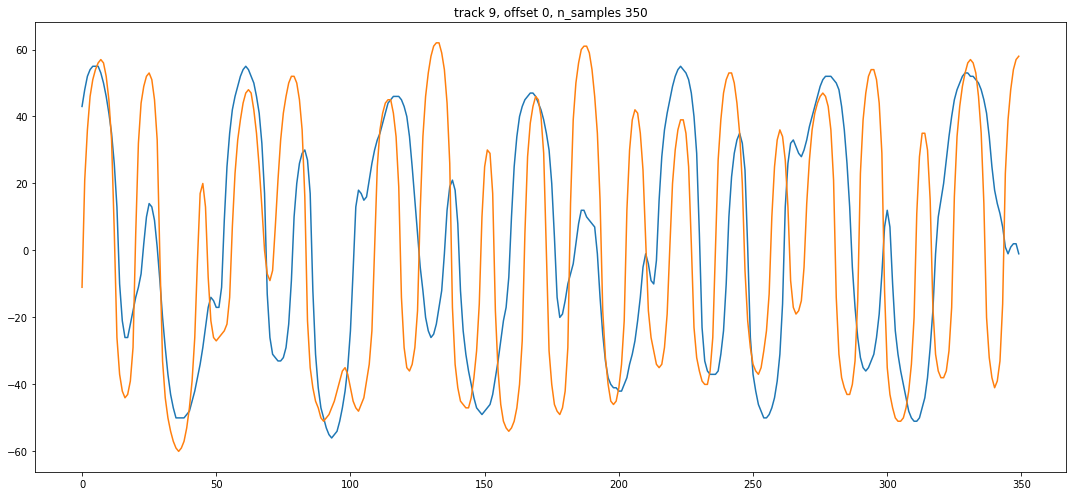

In [6]:
track_i = viz.plot_track(X)

In [7]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B is disabled in this directory.  Run `wandb on` to enable cloud syncing.
1:0 loss 5.97725 lr 1.833786e-04:  50%|█████     | 1/2 [00:49<00:49, 49.42s/it]


ValueError: Tried to step 3 times. The specified number of total steps is 1

In [ ]:
_, track = sample.sample(m, 100)

In [ ]:
viz.plot_track(track, n_samples=250000)

In [ ]:
ipd.Audio(audio.mu_expand(track[0], p), rate=p.sampling_rate)